In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 400
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'

In [10]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [11]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [12]:
e.lames.shape

(4, 31)

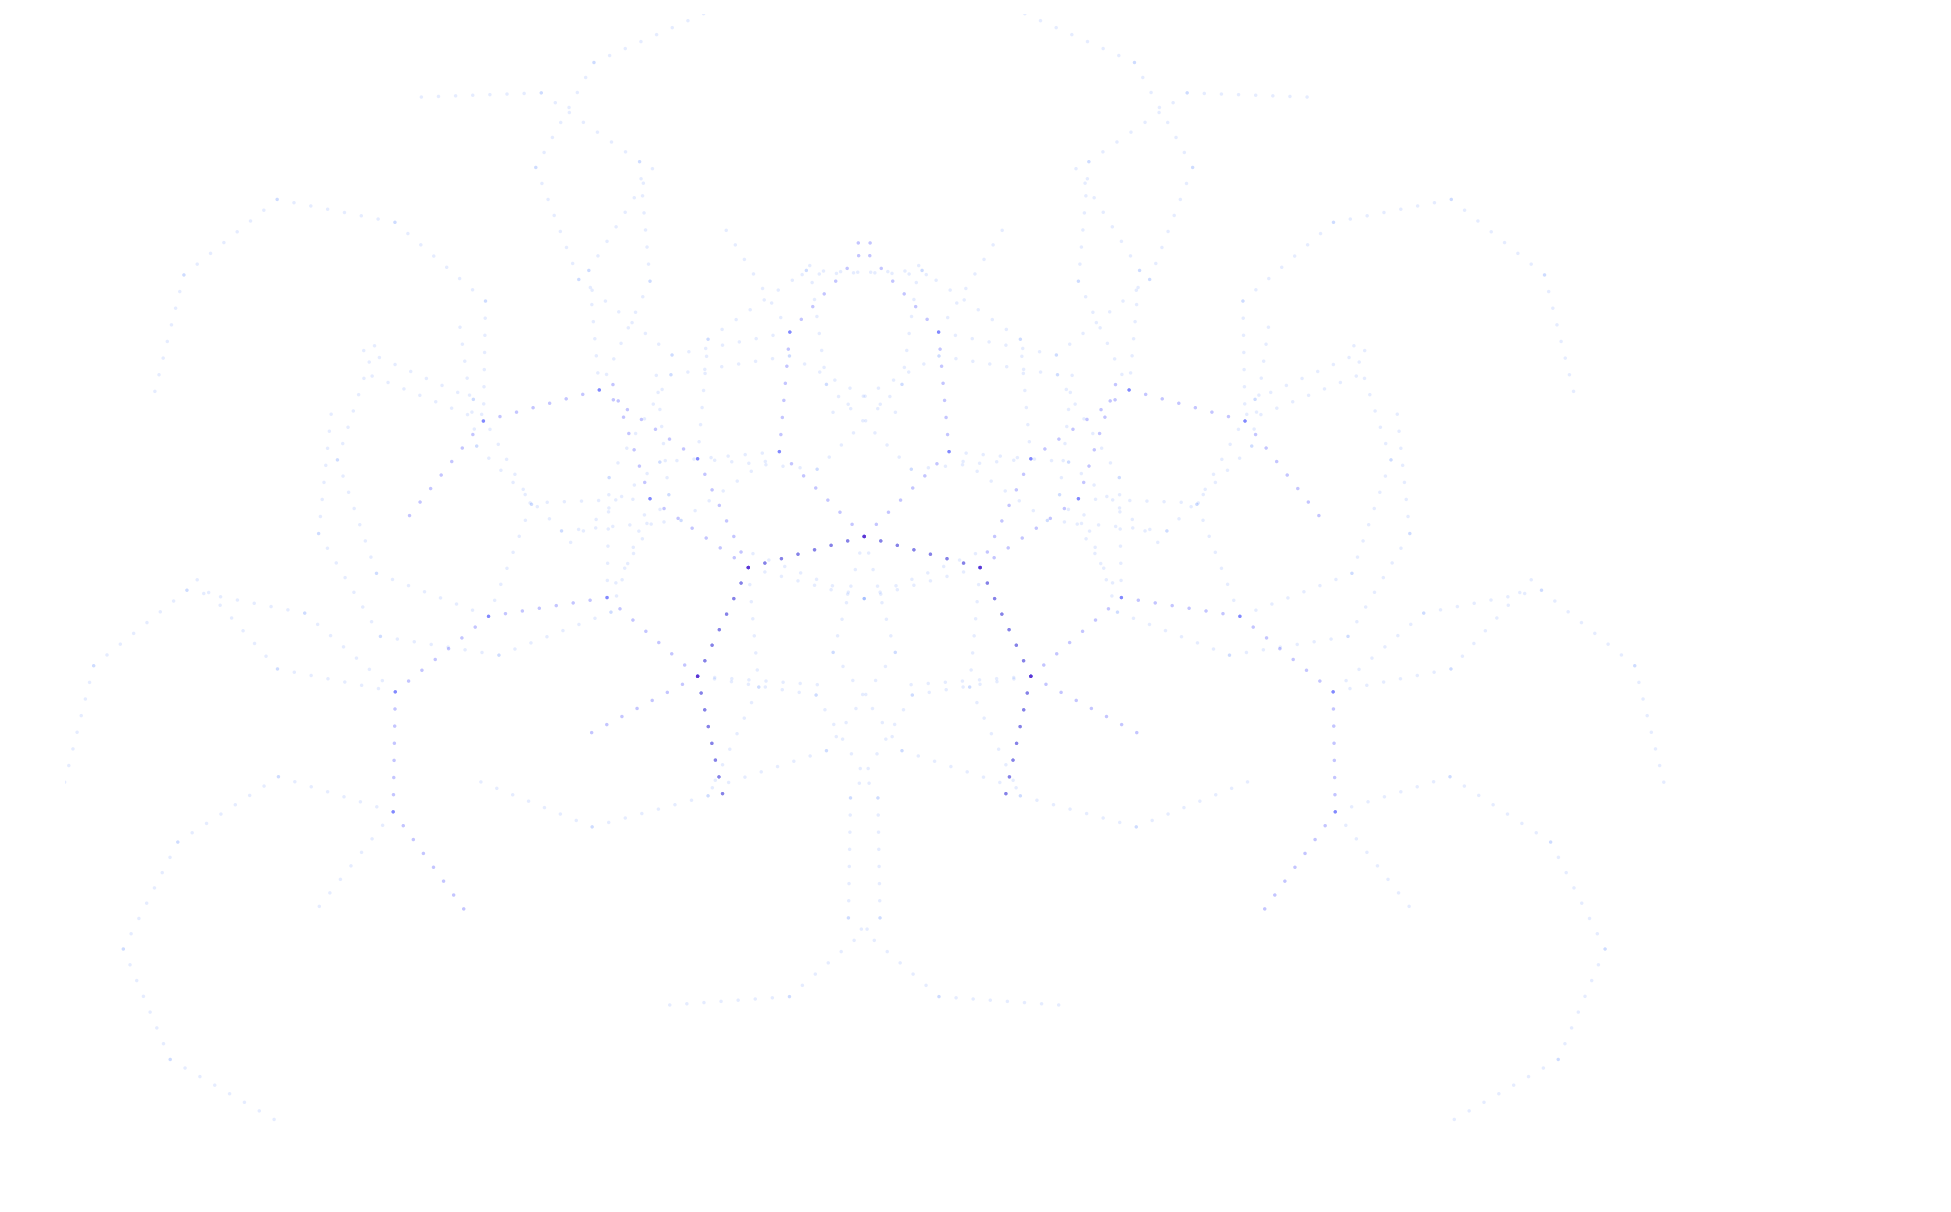

In [13]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
fig, ax = e.plot_structure()

In [14]:
e.particles.shape, e.N_particles, e.N_particles_per_lame

((3, 2352), 48, 8)

Greedy :

In [16]:
duration = el.get_default_args(el.EdgeGrid.render)['duration']
class EdgeGrid(el.EdgeGrid):
    def update(self, tau=.5):
        for i in range(14):
            ind_max = np.argmax(self.particles[2, :])
            self.particles[2, ind_max] = 0 # np.random.randn(self.particles.shape[1])
        #print (self.particles[2, :].min(), self.particles[2, :].max())
        self.particles[2, :] += self.dt/tau * (self.particles[2, :] - self.particles_ref)

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
e.particles_ref = e.particles[2, :].copy()
e.animate(scale = 32.)
#e.animate(fname='../files/expansion_foyers_greedy_12.mp4', scale = 32.)

TypeError: stat: can't specify None for path argument

In [ ]:
duration = el.get_default_args(el.EdgeGrid.render)['duration']
class EdgeGrid(el.EdgeGrid):
    def update(self, tau=.5):
        ind_max = np.argmax(self.particles[2, :])
        # TODO akin to pursuit
        #for i in range(14):
        #   
        #   self.particles[2, ind_max] = 0 # np.random.randn(self.particles.shape[1])
        #print (self.particles[2, :].min(), self.particles[2, :].max())
        self.particles[2, :] += self.dt/tau * (self.particles[2, :] - self.particles_ref)

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
e.particles_ref = e.particles[2, :].copy()
_ = e.animate(scale = 32.)
#e.animate(fname='../files/expansion_foyers_greedy_12.mp4', scale = 32.)

## git


In [6]:
!git s

 D ../files/figures/elasticite/circle.webm
 D ../files/figures/elasticite/cocircular_antiparallel_force.webm
 D ../files/figures/elasticite/cocircular_force.webm
 D ../files/figures/elasticite/elasticite_test.mp4
 D ../files/figures/elasticite/elasticite_test.webm
 D ../files/figures/elasticite/parallel_force.webm
 D ../files/figures/elasticite/sinc_mpl.webm
 D ../files/figures/elasticite/sinc_vispy.webm
 D ../files/figures/elasticite/svm.webm
 D ../files/figures/elasticite/test.mp4
 D ../files/figures/elasticite/test.webm
 D ../files/figures/elasticite/test_grid.webm
 D ../files/figures/elasticite/test_grid2.webm
 D ../files/figures/elasticite/trame_loggabor.webm
 D ../files/figures/elasticite/trame_sobel.webm
 D ../files/figures/elasticite/trame_sobel_cross.webm
 D ../files/figures/elasticite/trame_sobel_grating.webm
 D ../files/figures/elasticite/trame_sobel_line_tmp_4.webm
 D ../files/figures/elasticite/trame_sobel_orientation.webm
 D ../files/figures/elasticite/trame_sobel_orienta

In [ ]:
!git commit -am' expansion - miroir de la structure - focus'

In [7]:
!git commit -m' nb_pas '    ../src/elasticite.py


error: invalid object 100644 0474e6b1ed0786cde408cca646c82206efe068f0 for 'files/figures/elasticite/trame_sobel.webm'
error: invalid object 100644 0474e6b1ed0786cde408cca646c82206efe068f0 for 'files/figures/elasticite/trame_sobel.webm'
error: Error building trees


In [5]:
! git push


Everything up-to-date
